# The Linear Regression Model
### Learn how to use linear regression for machine learning.

##### Contents:
- Parametric vs. Nonparametric
- Intro to the Data
- Simple Linear Regression (univariate)
    - pandas.DataFrame.corr()
    - Residual Sum Of Squares (RSS)
        - comparison to MSE
- sklearn.linear_model.LinearRegression
- Multiple Linear Regression (multivariate)
- 


## 1: Instance Based Learning Vs. Model Based Learning

In the first course in this step, **Machine Learning Fundamentals**, we walked through the full machine learning workflow using the k-nearest neighbors algorithm. K-nearest neighbors works by finding similar, labelled examples from the training set for each instance in the test set and uses them to predict the label. K-nearest neighbors is known as an [instance-based learning](https://en.wikipedia.org/wiki/Instance-based_learning) algorithm because it relies completely on previous instances to make predictions. The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column.

Because the entire training dataset is used to find a new instance's nearest neighbors to make label predictions, this algorithm doesn't scale well to medium and larger datasets. If we have a million instances in our training data set and we want to make predictions for a hundred thousand new instances, we'd have to sort the million instances in the training set by Euclidean distance for *each* instance. The following diagram provides an overview of the complexity of k-nearest neighbors:

<img src="img/knn_complexity.svg">

We need to instead learn about **parametric machine learning** approaches, like linear regression and logistic regression. Unlike the k-nearest neighbors algorithm, the result of the training process for these machine learning algorithms is a mathematical function that best approximates the patterns in the training set. In machine learning, this function is often referred to as a model.

In this course, we'll explore the most commonly used machine learning model -- the **linear regression model**. Parametric machine learning approaches work by making assumptions about the relationship between the features and the target column. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:

$y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n$

The following diagram provides an overview of the machine learning process for linear regression. For now, the goal isn't to understand the entire process but more to compare and contrast with the **nonparametric** approach of k-nearest neighbors.

<img src="img/regression_complexity.svg">

In this mission, we'll provide an overview of how we use a linear regression model to make predictions. We'll use scikit-learn for the model training process, so we can focus on gaining intuition for the model-based learning approach to machine learning. In later missions in this course, we'll dive the math behind how a model is fit to the dataset, how to select and transform features, and more.

In the next screen, we'll introduce the dataset we'll be using throughout this course.

## 2: Introduction To The Data

To get familiar with this machine learning approach, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that predict the final sale price from its other other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) and download the dataset [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns:

- Lot Area: Lot size in square feet.
- Overall Qual: Rates the overall material and finish of the house.
- Overall Cond: Rates the overall condition of the house.
- Year Built: Original construction date.
- Low Qual Fin SF: Low quality finished square feet (all floors).
- Full Bath: Full bathrooms above grade.
- Fireplaces: Number of fireplaces.

Let's start by generating train and test datasets and getting more familiar with the data.

#### Instructions:

- Read AmesHousing.txt into a dataframe using the tab delimiter (\t) and assign to data.
- Select the first 1460 rows from from data and assign to train.
- Select the remaining rows from data and assign to test.
- Use the dataframe.info() method to display information about each column.
- Read the data documentation to get more familiar with each column.
- Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to target.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_table("data/AmesHousing.txt", delimiter="\t")
data.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
0   NaN       IR1          Lvl    ...             0     NaN    NaN   
1   NaN       Reg          Lvl    ...             0     NaN  MnPrv   
2   NaN       IR1          Lvl    ...             0     NaN    NaN   
3   NaN       Reg          Lvl    ...             0     NaN    NaN   
4   NaN       IR1          Lvl    ...             0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0          NaN        0       5    2010       WD           Normal     215000  
1          NaN        0       6    2010       WD           Normal     105000  
2         Gar2    12500       6    2010       WD           Normal     172000  
3          NaN        0       4    2010       WD           Normal     244000  
4          NaN        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [8]:
train = data.iloc[:1460]
test = data.iloc[1460:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [10]:
target = "SalePrice"

## 3: Simple Linear Regression

We'll start by understanding the univariate case of linear regression, also known as **simple linear regression**. The following equation is the general form of the simple linear regression model.

$\hat{y} = a_1x_1 + a_0$

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, $a_0$ and $a_1$ represent the **parameter** values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:

<img src="img/simple_linear_regression.svg">

The first step is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $a_1$ and $a_0$ based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

#### Instructions:
- Generate 3 scatter plots in the same column:
    - The first plot should plot the Garage Area column on the x-axis against the SalePrice column on the y-axis.
    - The second one should plot the Gr Liv Area column on the x-axis against the SalePrice column on the y-axis.
    - The third one should plot the Overall Cond column on the x-axis against the SalePrice column on the y-axis.
- Read more about these 3 columns in the data documentation.

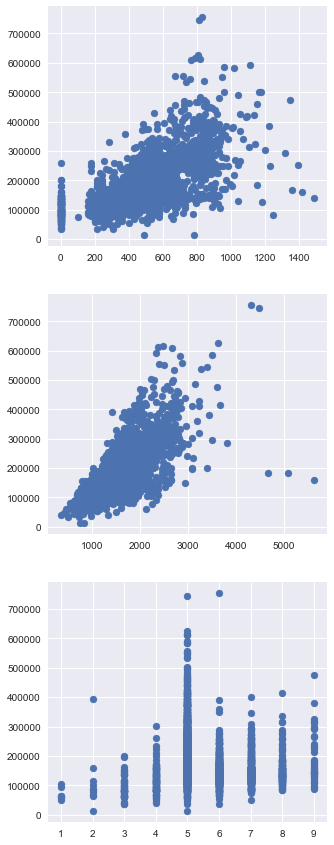

In [24]:
f, axes = plt.subplots(3, 1)
f.set_size_inches(5,15)
axes[0].scatter(data['Garage Area'], data['SalePrice'])
axes[1].scatter(data['Gr Liv Area'], data['SalePrice'])
axes[2].scatter(data['Overall Cond'], data['SalePrice'])

## 4: Least Squares

From the last screen, we can tell that the `GrLivArea` feature correlates the most with the `SalePrice` column. We can confirm this by calculating the correlation between pairs of these columns using the [pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method:

    >>> train[['GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']].corr()
                 GarageArea  GrLivArea  OverallCond  SalePrice
    GarageArea     1.000000   0.468997    -0.151521   0.623431
    GrLivArea      0.468997   1.000000    -0.079686   0.708624
    OverallCond   -0.151521  -0.079686     1.000000  -0.077856
    SalePrice      0.623431   0.708624    -0.077856   1.000000
    
The correlation between `GrLivArea` and `SalePrice` is around `0.709`, which is the highest. Recall that the closer the correlation coefficient is to `1.0`, the stronger the correlation. Here's the updated form of our model:    

$\hat{y} = a_1*GrLivArea + a_0$

Let's now move on to understanding the model fitting criteria.

**Residual Sum Of Squares**

To find the optimal parameters for a linear regression model, we want to optimize the model's **residual sum of squares** (or [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)). If you call, residual (often referred to as errors) describes the difference between the predicted values for the target column ($\hat y$) and the true values ($y$):

<img src="img/visualizing_rss.svg">

We want this difference to be as small as possible. Calculating RSS involves summing the *squared* errors:

$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2$

We can shorten this to:

$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

If you recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error). Here's the formula for MSE, adapted for our new notation:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

While we used the MSE on the test set, it's clear that the goal of minimizing RSS on the training set when training is a good idea.

## 5: Using Scikit-Learn To Train And Predict

Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

Instead of working with the `sklearn.neighbors.KNeighborsRegressors` class, we work with the `sklearn.linear_model.LinearRegression` class. The `LinearRegression` class also has it's own `fit()` method. Specific to this model, however, is the `coef_` and `intercept_` attributes, which return $a_1$ ($a_1$ to $a_n$ if it were a multivariate regression model) and $a_0$accordingly.

#### Instructions:
- Import and instantiate a linear regression model.
- Fit a linear regression model that uses the feature and target columns we explored in the last 2 screens. Use the default arguments.
- Display the coefficient and intercept of the fitted model using the coef_ and intercept_ attributes.
- Assign $a_1$ to a1 and $a_0$ to a0.

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train[['Gr Liv Area']], train.SalePrice)
a1 = model.coef_
a0 = model.intercept_

print(a0, a1)

5366.82171006 [ 116.86624683]


## 6: Making Predictions

In the last step, we fit a univariate linear regression model between the `GrLivArea` and `SalePrice` column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

$\hat{y} = 116.86624683x_1 + 5366.82171006$

One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the `predict()` method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the MSE value for those predictions as well.

#### Instructions:
- Use the fitted model to make predictions on both the training and test sets.
- Calculate the RMSE value for the predictions on the training set and assign to train_rmse.
- Calculate the RMSE value for the predictions on the training set and assign to test_rmse.

In [30]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(train[['Gr Liv Area']])
train_mse = mean_squared_error(train_predictions, train.SalePrice)
train_rmse = train_mse ** (1/2)

test_predictions = model.predict(test[['Gr Liv Area']])
test_mse = mean_squared_error(test_predictions, test.SalePrice)
test_rmse = test_mse ** (1/2)

print(train_rmse, test_rmse)

56034.3620014 57088.2516126


## 7: Multiple Linear Regression

Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called **multiple linear regression**). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:

$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$

When using multiple features, the main challenge is **selecting relevant features**. In a later mission in this course, we'll dive into some approaches for feature selection. For now, let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.

- Lot Area
- Gr Liv Area

#### Instructions:
- Train a linear regression model using the columns in cols.
- Use the fitted model to make predictions on both the training and test dataset.
- Calculate the RMSE value for the predictions on the training set and assign to train_rmse_2.
- Calculate the RMSE value for the predictions on the training set and assign to test_rmse_2.

In [32]:
cols = ['Overall Cond', 'Gr Liv Area']
model.fit(train[cols], train['SalePrice'])
train_predictions = model.predict(train[cols])
test_predictions = model.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56032.3980153
57066.9077945


## 8: Next Steps

In this mission, we explored the basics of linear regression for machine learning. In the next two missions, we'll dive deeply into 2 different approaches for fitting a linear regression model.